### I. Import Various Libraries, Read in data and Remove Data Errors

In [149]:
import time
import pandas as pd
from datetime import datetime,timedelta
import numpy as np
from dateutil.parser import parse
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import matplotlib.ticker as ticker
from matplotlib.finance import candlestick2_ohlc
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
%matplotlib inline

In [8]:
df=pd.read_csv('C:/Users/Yu Yu/Documents/career/finance/test/cubist_project/data.1_min.csv',header=None,names=('timestamp','price'))
df.head()

,timestamp,price
0,1990-01-08 15:32:00,411.25
1,1990-01-08 15:33:00,411.25
2,1990-01-08 15:34:00,411.75
3,1990-01-08 15:35:00,411.50
4,1990-01-08 15:36:00,411.50


In [24]:
df=df.set_index('timestamp')

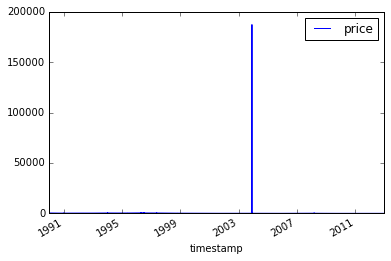

In [27]:
#plotting it along time line, found an outlier
df.plot()

In [36]:
#replace the price point with price in the previous minute. 
temp=df[df['price']>5000].index
df.ix[temp,'price']=df.ix[temp-timedelta(minutes = 1),'price']

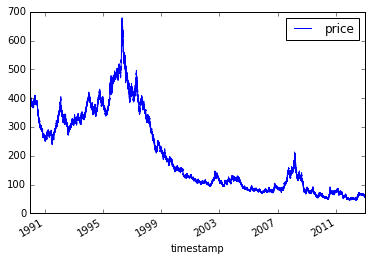

In [37]:
#check to see whether outliers are all removed
df.plot()

In [38]:
#check for duplications
df.index.is_unique

True

In [41]:
df_daily=df.resample('D',how='ohlc')
df_daily.head()

price                        
              open    high     low   close
timestamp                                 
1990-01-08  411.25  412.00  410.00  410.00
1990-01-09  408.25  408.50  406.25  406.75
1990-01-10  406.00  406.25  403.25  405.50
1990-01-11  406.75  407.00  403.25  404.50
1990-01-12  406.75  406.75  400.75  402.00

In [189]:
o=df_daily['price']['open']
c=df_daily['price']['close']
h=df_daily['price']['high']
l=df_daily['price']['low']
#d=df_daily.index[0:50].strftime('%Y-%m-%d').reshape(50,1)
#d=df_daily.index[0:50].strftime('%Y-%m-%d').reshape(50,1)
#quote=np.concatenate((d,o,c,h,l,np.zeros(50).reshape(50,1)),axis=1)
a=range(len(df_daily.index))
new=[]
for i in a:
    if i%365==0:
      new.append(i)  
x=df_daily.index.strftime('%Y')

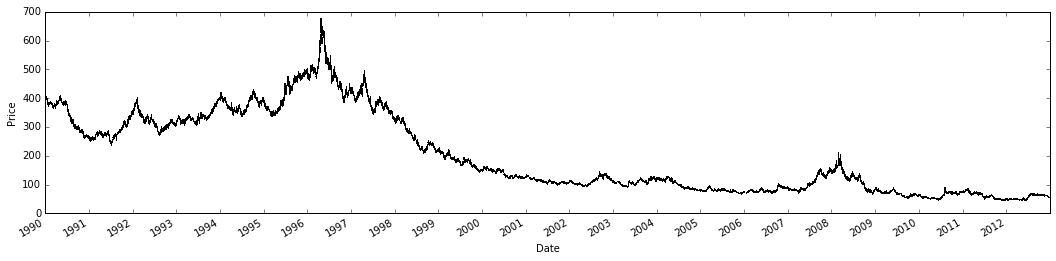

In [190]:
fig = plt.figure(figsize=(18,4))
ax1 = plt.subplot(1,1,1)
# every 3rd month
#months = MonthLocator(df_daily.index[0:10], bymonthday=1, interval=1)
#monthsFmt = DateFormatter("%b '%y")
#ax1.xaxis.set_major_locator(months)
#ax1.xaxis.set_major_formatter(monthsFmt)
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(new,x[new], rotation=45)
candlestick2_ohlc(ax1,o,h,l,c,width=1,colorup='k',colordown='r')
ax1.autoscale_view()
fig.autofmt_xdate()